<a href="https://colab.research.google.com/github/Inyrkz/covid-classifier/blob/main/pneuX_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_visualizer import visualizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# creating models directory
import os
if not os.path.isdir('models'):
  os.mkdir('models')

# checking TensorFlow version and GPU usage
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Tensorflow version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


In [ ]:
# setting path to the main directory
main_dir = "/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray"

In [ ]:
# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')

In [ ]:
# Setting path to the test directory
test_dir = os.path.join(main_dir, 'test')

In [ ]:
# Directory with train covid images
train_pneumo_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with train normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

In [ ]:
# Directory with test covid image
test_pneumo_dir = os.path.join(test_dir, 'PNEUMONIA')

# Directory with test normal image
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
# Creating a list of filenames in each directory
train_pneumo_names = os.listdir(train_pneumo_dir)
print(train_pneumo_names[:10])  # printing a list of the first 10 names

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_pneumo_names = os.listdir(test_pneumo_dir)
print(test_pneumo_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['person521_virus_1040.jpeg', 'person518_bacteria_2198.jpeg', 'person539_virus_1069.jpeg', 'person537_bacteria_2262.jpeg', 'person549_bacteria_2305.jpeg', 'person541_bacteria_2275.jpeg', 'person527_bacteria_2225.jpeg', 'person507_bacteria_2141.jpeg', 'person518_bacteria_2197.jpeg', 'person541_virus_1071.jpeg']
['IM-0531-0001-0001.jpeg', 'IM-0516-0001.jpeg', 'IM-0525-0001.jpeg', 'IM-0511-0001.jpeg', 'IM-0522-0001.jpeg', 'IM-0517-0001.jpeg', 'IM-0520-0001.jpeg', 'IM-0519-0001-0002.jpeg', 'IM-0527-0001.jpeg', 'IM-0523-0001-0001.jpeg']
['person100_bacteria_480.jpeg', 'person101_bacteria_484.jpeg', 'person109_bacteria_519.jpeg', 'person100_bacteria_482.jpeg', 'person109_bacteria_513.jpeg', 'person101_bacteria_485.jpeg', 'person108_bacteria_506.jpeg', 'person100_bacteria_481.jpeg', 'person104_bacteria_491.jpeg', 'person108_bacteria_511.jpeg']
['IM-0023-0001.jpeg', 'IM-0011-0001.jpeg', 'IM-0013-0001.jpeg', 'IM-0029-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0007-0001.jpeg', 'IM

In [ ]:
# Printing total number of images present in each set
print('Total no of images in training set:', len(train_pneumo_names
                                                + train_normal_names))

print("Total no of images in test set:", len(test_pneumo_names
                                            + test_normal_names))

Total no of images in training set: 5218
Total no of images in test set: 640


In [ ]:
# Printing total number of pneumo images in dataset
print('Total no of pneumo images:', len(train_pneumo_names + test_pneumo_names))

# Printing total number of normal images in dataset
print("Total no of normal images:", len(train_normal_names + test_normal_names))

Total no of pneumo images: 4274
Total no of normal images: 1584


In [ ]:
# Data Visualization
import matplotlib.image as mpimg

# Setting the no of rows and columns
ROWS = 4
COLS = 4

# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure
# when using pyplot
fig.set_size_inches(16, 16)

<Figure size 1152x1152 with 0 Axes>

In [ ]:
# get the directory to each image file in the trainset
pneumo_pic = [os.path.join(train_pneumo_dir, filename) for filename in train_pneumo_names[:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]
print(pneumo_pic)
print(normal_pic)

# merge pneumo and normal lists
merged_list = pneumo_pic + normal_pic
print(merged_list)

['/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person521_virus_1040.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person518_bacteria_2198.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person539_virus_1069.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person537_bacteria_2262.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person549_bacteria_2305.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person541_bacteria_2275.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person527_bacteria_2225.jpeg', '/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/PNEUMONIA/person507_bacteria_2141.jpeg']
['/content/drive/My Drive/Mydataset/Project/chest_xray/chest_xray/train/NORMAL/IM-0531-0001-0001.jpeg', '/con

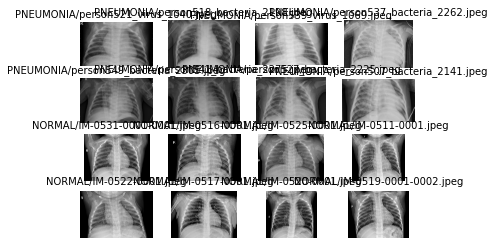

In [ ]:
# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('/', 9)[9]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=10)
    # displaying data as image
    plt.imshow(img, cmap='gray')
    
plt.show()  # display the plot

In [ ]:
# Data Preprocessing and Augumentation

# Generate training, testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True)

dgen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Awesome HyperParameters!!!
TARGET_SIZE = (200, 200)
BATCH_SIZE = 32
CLASS_MODE = 'binary'


# Connecting the ImageDataGenerator objects to our dataset
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=TARGET_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 5216 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [ ]:
# Get the class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# Get the image shape
train_generator.image_shape

(200, 200, 3)

In [ ]:
# Building CNN Model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       1

In [ ]:
# Compile the Model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Train the Model
history = model.fit(train_generator,
          epochs=80,
          validation_data=test_generator,
          callbacks=[
          # Stopping our training if val_accuracy doesn't improve after 20 epochs
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           patience=20),
          # Saving the best weights of our model in the model directory
        
          # We don't want to save just the weight, but also the model architecture
          tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy'
                                             )
    ])


Epoch 1/80
163/163 [==============================] - 1910s 12s/step - loss: 0.5666 - accuracy: 0.7634 - precision: 0.7825 - recall: 0.9465 - val_loss: 0.5521 - val_accuracy: 0.7688 - val_precision: 0.7358 - val_recall: 0.9799
Epoch 2/80
163/163 [==============================] - 574s 4s/step - loss: 0.2403 - accuracy: 0.9017 - precision: 0.9254 - recall: 0.9444 - val_loss: 0.3192 - val_accuracy: 0.8562 - val_precision: 0.9203 - val_recall: 0.8417
Epoch 3/80
 56/163 [=========>....................] - ETA: 6:02 - loss: 0.2381 - accuracy: 0.8968 - precision: 0.9270 - recall: 0.9355

KeyboardInterrupt: ignored

In [ ]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

# Transfer Learning

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Initializing the CNN
cnn = models.Sequential()
cnn.add(conv_base)  # Add VGG16 layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

In [ ]:
# Freeze VGG16 layer
conv_base.trainable = False
cnn.summary()

In [ ]:
# Compile the Model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Stopping our training if val_accuracy doesn't improve after 20 epochs
 checkpoint_ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                  patience=20)
 
# Saving the whole model architecture and weights
checkpoint_MC = tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                   save_best_only=True,
                                                   save_weights_only=False,
                                                   monitor='val_accuracy')

In [ ]:
# Training the CNN
history = cnn.fit(x = train_generator,
                  validation_data = test_generator,
                  epochs = 80,
                  callbacks=[checkpoint_ES, checkpoint_MC])

In [ ]:
# Getting test accuracy and loss
model = 
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

# Make Predictions on New Data

In [ ]:
# Prediction on New Data
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for filename in uploaded:
    # get image path
    img_path = '/content' + filename
    # load and resize image to 150x150
    img = image.load_img(img_path, target_size=(150, 150))
    # convert image to numpy array
    images = image.img_to_array(img)
    # expand dimension of image
    images.np.expand_dims(images, axis=0)
    # making prediction with model
    prediction = model.predict(images)
    print(filename)
    
    if prediction == 0:
        print('COVID Detected')
    else:
        print('Report is Normal')